# Simon Mokhanda (Modelling Options on Futures & Forwards)

### 1) Defining Functions

In [1]:
import math
from scipy import special
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def myNormCDF(x):
    return 0.5*(math.erfc(-x/np.sqrt(2)))
#myNormCDF(1)

In [3]:
def myNormInv(p):
    return -1*np.sqrt(2)*special.erfcinv(2*p)
#myNormInv(0.5)

In [4]:
def myNormPDF(x):
    return (1/np.sqrt(2*np.pi))*np.exp(-1*(x**x)/2)
#myNormPDF(2)

In [5]:
def myPDF(x,av,sg):
    return (1/np.sqrt(2*np.pi*sg*sg))**np.exp(-((x-av)**2)/(2*sg*sg))
#myPDF(2,4,2)

### 2) Importing Futures Data

In [6]:
import pandas as pd
Dataframe = pd.read_excel('S&P500Futures_B.xlsx')
Dataframe.head(-1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,2055.00,2067.25,2038.75,2046.25,2046.25,1358348
1,2015-01-05,2045.75,2048.25,2009.50,2016.00,2016.00,2033774
2,2015-01-06,2019.00,2023.50,1984.25,1994.50,1994.50,2345361
3,2015-01-07,1996.50,2023.75,1995.75,2019.50,2019.50,1760658
4,2015-01-08,2020.50,2058.50,2020.25,2055.00,2055.00,1555733
...,...,...,...,...,...,...,...
1619,2021-06-25,4262.00,4276.75,4253.50,4271.25,4271.25,906160
1620,2021-06-28,4275.00,4282.00,4264.25,4280.50,4280.50,823723
1621,2021-06-29,4280.50,4291.00,4271.75,4282.00,4282.00,741471
1622,2021-06-30,4284.75,4294.25,4269.25,4288.50,4288.50,1100062


In [7]:
Dataframe.rename(columns = {'Adj Close':'AdjustedClose'}, inplace = True)
Dataframe.head()

,Date,Open,High,Low,Close,AdjustedClose,Volume
0,2015-01-02,2055.00,2067.25,2038.75,2046.25,2046.25,1358348
1,2015-01-05,2045.75,2048.25,2009.50,2016.00,2016.00,2033774
2,2015-01-06,2019.00,2023.50,1984.25,1994.50,1994.50,2345361
3,2015-01-07,1996.50,2023.75,1995.75,2019.50,2019.50,1760658
4,2015-01-08,2020.50,2058.50,2020.25,2055.00,2055.00,1555733


In [8]:
FuturesPrice = Dataframe.AdjustedClose 
FuturesPrice.head()

0    2046.25
1    2016.00
2    1994.50
3    2019.50
4    2055.00
Name: AdjustedClose, dtype: float64

In [9]:
import numpy as np
F=np.array(FuturesPrice)
F

array([2046.25, 2016.  , 1994.5 , ..., 4288.5 , 4310.75, 4342.75])

In [10]:
F[5]-F[6]

12.75

In [11]:
min(F),max(F)

(1824.5, 4342.75)

### 3) Pricing of S\&P500 Call on Original Futures

In [12]:
def BlackCall(K,F,T,vol,r):
    d1 = (np.log(F/K)+ ((vol**2)/2)*T)/ (vol*np.sqrt(T))
    d2 = d1-vol*np.sqrt(T)
    myNormCDF1=np.array([myNormCDF(a) for a in d1])
    myNormCDF2=np.array([myNormCDF(b) for b in d2])
    return np.exp(-r*T)*(F*myNormCDF1-K*myNormCDF2)

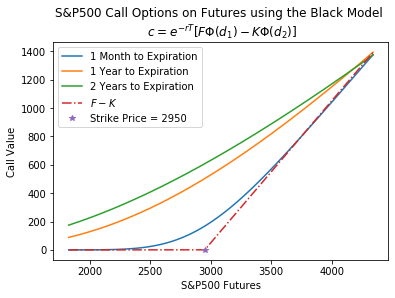

In [101]:
r=0.147; vol=0.5; K=2950;
F
Expiration=[1/12,1,2]
c=np.zeros((3,len(F)))
for i in range(3):
    T=Expiration[i]
    c[i,:]=BlackCall(K,F,T,vol,r)
FK=np.maximum(0,(F-K))
plt.title('S&P500 Call Options on Futures using the Black Model \n $c=e^{-rT}[F\Phi(d_1)-K\Phi(d_2)]$')
plt.plot(F,c[0],F,c[1],F,c[2],F,FK,'-.',K,0,'*')
plt.xlabel('S&P500 Futures')
plt.ylabel('Call Value')
plt.legend (['1 Month to Expiration','1 Year to Expiration',
'2 Years to Expiration',
'$F-K$','Strike Price = 2950','NorthWest'])
plt.savefig("Call1.jpg",bbox_inches='tight')
plt.show()


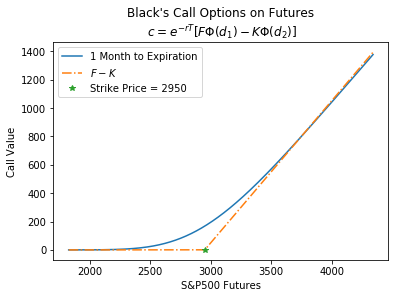

In [100]:
r=0.147; vol=0.5; K=2950;
F
#Expiration=[1/12,1,2]
c=np.zeros((len(F)))
#for i in range(3):
T=1/12
c=BlackCall(K,F,T,vol,r)
FK=np.maximum(0,(F-K))
plt.title('Black\'s Call Options on Futures\n $c=e^{-rT}[F\Phi(d_1)-K\Phi(d_2)]$')
plt.plot(F,c,F,FK,'-.',K,0,'*')
plt.xlabel('S&P500 Futures')
plt.ylabel('Call Value')
plt.legend (['1 Month to Expiration',
'$F-K$','Strike Price = 2950','NorthWest'])
plt.savefig("Call11.jpg",bbox_inches='tight')
plt.show()

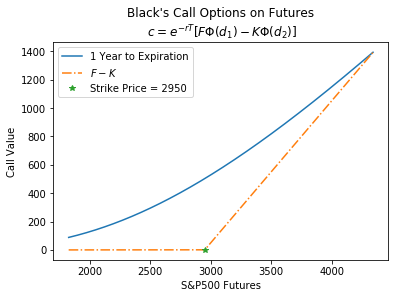

In [99]:
r=0.147; vol=0.5; K=2950;
F
#Expiration=[1/12,1,2]
c=np.zeros((len(F)))
#for i in range(3):
T=1
c=BlackCall(K,F,T,vol,r)
FK=np.maximum(0,(F-K))
plt.title('Black\'s Call Options on Futures\n $c=e^{-rT}[F\Phi(d_1)-K\Phi(d_2)]$')
plt.plot(F,c,F,FK,'-.',K,0,'*')
plt.xlabel('S&P500 Futures')
plt.ylabel('Call Value')
plt.legend (['1 Year to Expiration',
'$F-K$','Strike Price = 2950','NorthWest'])
plt.savefig("Call22.jpg",bbox_inches='tight')
plt.show()

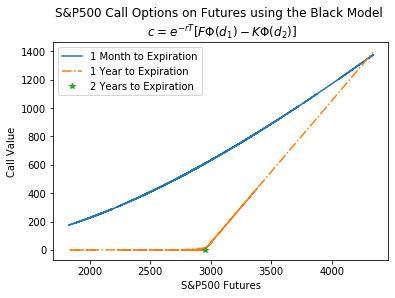

In [16]:
r=0.147; vol=0.5; K=2950;
F
#Expiration=[1/12,1,2]
c=np.zeros((len(F)))
#for i in range(3):
T=2
c=BlackCall(K,F,T,vol,r)
FK=np.maximum(0,(F-K))
plt.title('S&P500 Call Options on Futures using the Black Model \n $c=e^{-rT}[F\Phi(d_1)-K\Phi(d_2)]$')
plt.plot(F,c,F,FK,'-.',K,0,'*')
plt.xlabel('S&P500 Futures')
plt.ylabel('Call Value')
plt.legend (['1 Month to Expiration','1 Year to Expiration',
'2 Years to Expiration',
'$F-K$','Strike Price = 2950','NorthWest'])
plt.savefig("Call1.jpg",bbox_inches='tight')
plt.show()

### 4) Pricing S\&P500 Call on Predicted Futures

In [17]:
def BlackCall_New(K,FN,T,vol,r):
    d1 = (np.log(FN/K)+ ((vol**2)/2)*T)/ (vol*np.sqrt(T))
    d2 = d1-vol*np.sqrt(T)
    myNormCDF1=np.array([myNormCDF(a) for a in d1])
    myNormCDF2=np.array([myNormCDF(b) for b in d2])
    return np.exp(-r*T)*(FN*myNormCDF1-K*myNormCDF2)

In [18]:
#r=0.147; vol=0.5; K=2950;
#FN
#Expiration=[1/12,1,2]
#c=np.zeros((3,len(FN)))
#for i in range(3):
#    T=Expiration[i]
#    c[i,:]=BlackCall_New(K,FN,T,vol,r)
#FNK=np.maximum(0,(FN-K))
#plt.title('S&P500 Call Options on Predicted Futures using the Black Model \n $c=e^{-rT}[F\Phi(d_1)-K\Phi(d_2)]$')
#plt.plot(FN,c[0],FN,c[1],FN,c[2],FN,FNK,'-.',K,0,'*')
#plt.xlabel('S&P500 Futures')
#plt.ylabel('Call Value')
#plt.legend (['1 Month to Expiration','1 Year to Expiration',
#'2 Years to Expiration',
#'$F-K$','Strike Price = 2950','NorthWest'])
#plt.savefig("Call2.jpg",bbox_inches='tight')
#plt.show()

### 5) Pricing of S\&P500 Put Options

In [19]:
def BlackPut(K,F,T,vol,r):
    d1 = (np.log(F/K)+ ((vol**2)/2)*T)/ (vol*np.sqrt(T))
    d2 = d1-vol*np.sqrt(T)
    myNormCDF1=np.array([myNormCDF(a) for a in d1])
    myNormCDF2=np.array([myNormCDF(b) for b in d2])
    return np.exp(-r*T)*(K*myNormCDF1*(-d2)-F*myNormCDF1*(-d1))


In [20]:
r=0.147; vol=0.5; K=3450;
F
Expiration=[4/12,1,2]
c=np.zeros((3,len(F)))
for i in range(3):
    T=Expiration[i]
    c[i,:]=BlackPut(K,F,T,vol,r)
FK=np.maximum(0,(K-F))
#plt.title('S&P500 Put Options using the Black Model \n $p=e^{-rT}[K\Phi(-d_2)-F\Phi(-d_1)]$')
#plt.plot(F,c[0],F,c[1],F,c[2],F,FK,'-.',K,0,'*')
#plt.xlabel('S&P500 Futures')
#plt.ylabel('Put Value')
#plt.legend (['1 Month to Expiration','1 Year to Expiration',
#'2 Years to Expiration',
#'$K-F$','Strike Price','NorthWest'])
#plt.savefig("App2.jpg")
#plt.show()

### 6) Delta Greek Dependence

In [21]:
def BlackDelta(K,F,T,vol,r):
    d1 = (np.log(F/K)+ ((vol**2)/2)*T)/ (vol*np.sqrt(T))
    myNormCDF1=np.array([myNormCDF(a) for a in d1])
    return np.exp(-r*T)*myNormCDF1

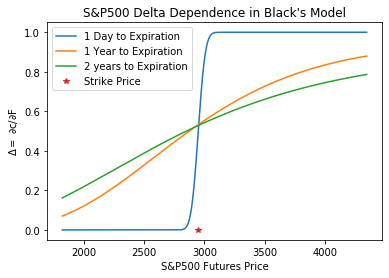

In [106]:
r=0.05; vol=0.3; K=2950;
F
Expiration=[1/12,1,2]
DeltavF=np.zeros((3,len(F)))
for i in range(3):
    T=i+1/365
    DeltavF[i,:]=BlackDelta(K,F,T,vol,r )
plt.plot (F,DeltavF[0],F,DeltavF[1],F,DeltavF[2],K,0,'*')
plt.xlabel('S&P500 Futures Price')
plt.ylabel('$\Delta =$ $\partial$c/$\partial$F')
plt.title('S&P500 Delta Dependence in Black\'s Model')
plt.legend (['1 Day to Expiration','1 Year to Expiration',
'2 years to Expiration','Strike Price','NorthWest'])
plt.savefig("Dep.jpg")
plt.show()


### 7) S&P500 Put-Call Parity Condition


In [23]:
def BlackCall2(K,F,T,vol,r):
    d1 = (np.log(F/K)+ ((vol**2)/2)*T)/ (vol*np.sqrt(T))
    d2 = d1-vol*np.sqrt(T)
    myNormCDF1=np.array([myNormCDF(a) for a in d1])
    myNormCDF2=np.array([myNormCDF(b) for b in d2])
    return np.exp(-r*T)*(F*myNormCDF1-K*myNormCDF2)

In [24]:
def BlackPut2(K,F,T,vol,r):
    d1 = (np.log(F/K)+ ((vol**2)/2)*T)/ (vol*np.sqrt(T))
    d2 = d1-vol*np.sqrt(T)
    myNormCDF1=np.array([myNormCDF(-a) for a in d1])
    myNormCDF2=np.array([myNormCDF(-b) for b in d2])
    return np.exp(-r*T)*(K*myNormCDF2-F*myNormCDF1)

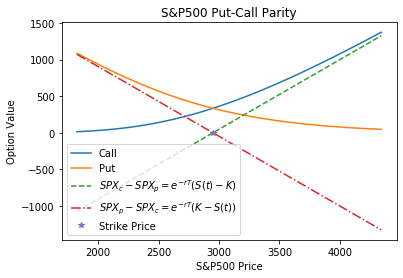

In [107]:
F 
K=2950
T=1
c=np.zeros((3,len(F)))
p=np.zeros((3,len(F)))

c = BlackCall2(K,F,T,vol,r )
p = BlackPut2(K,F,T,vol,r)

plt.plot(F,c,F,p,F,c-p,'--', F, p-c,'-.', K,0,'*')
plt.xlabel('S&P500 Price'); plt.ylabel('Option Value')
plt.title('S&P500 Put-Call Parity')
plt.legend (['Call','Put','$SPX_c-SPX_p=e^{-rT}(S(t)-K)$','$SPX_p-SPX_c=e^{-rT}(K-S(t))$','Strike Price','North'])
plt.savefig("PC3.jpg",bbox_inches='tight')
plt.show()

### 8) Pricing Call Options for Different Parameters

In [26]:
def BlackCall3(K,F3,T2,vol,r):
    d1 = (np.log(F3/K)+ ((vol**2)/2)*T2)/ (vol*np.sqrt(T2))
    d2 = d1-vol*np.sqrt(T2)
    return np.exp(-r*T2)*(F3*myNormCDF(d1)-K*myNormCDF(d2))

In [27]:
BlackCall3(4250,4474.25,1/12,0.1639,0.05)

237.78611473590018

### 9) Pricing Put Options for Different Parameters

In [28]:
def BlackPut3(K,F4,T3,vol,r):
    d1 = (np.log(F4/K)+ ((vol**2)/2)*T3)/ (vol*np.sqrt(T3))
    d2 = d1-vol*np.sqrt(T3)
    return np.exp(-r*T3)*(K*myNormCDF(-d2)-F4*myNormCDF(-d1))

In [29]:
BlackPut3(4020,4464.33,1/12,0.171,1.08)

1.1570906258526057

## 10) Barone-Adesi-Whaley Quadratic Approximation

In [30]:
def Barone_Adesi_Whaley_BlackCall(K,F,T,vol,r):
    d2 = d1-vol*np.sqrt(T)
    return np.exp(-r*T)*(F*myNormCDF(d1)-K*myNormCDF(d2))

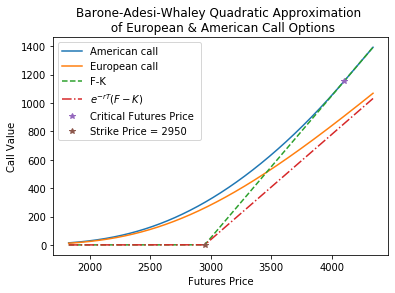

In [95]:
F
r=0.3
vol=0.3
deviat=1000
K=2950
Fstar=K*1.5
T=1
Mdivh=2*r/(vol**2*(1-np.exp(-r*T)))
q2= 0.5*(1+np.sqrt(1+4*Mdivh))
#myNormCDF3=np.array([myNormCDF(c) for a in d1])
#myNormCDF2=np.array([myNormCDF(b) for b in d2])

while(deviat>10**(-10)):
    d1 = (np.log(Fstar/K)+ (vol**2/2)*T)/(vol*np.sqrt(T))
    #print("d1",d1)
    g=Barone_Adesi_Whaley_BlackCall(K,Fstar,T,vol,r)+(Fstar/q2)*(1-np.exp(-r*T)*myNormCDF(d1))-Fstar+K
    #print("K,Fstar,T,vol,r",K,Fstar,T,vol,r)
    #print("g",g)
    gprime = -1+(np.exp(-r*T)*myNormCDF(d1))*(1-1/q2)+(1/q2)*(1-(np.exp(-r*T)*myNormPDF(d1))/(vol*np.sqrt(T)))
    #print("gprime",gprime)
    deviat=g/gprime
    #print("deviat",deviat)
    Fstar=Fstar-deviat
    #print("Fstar",Fstar)
    deviat=np.abs(deviat)
    #print("deviat",deviat)
    #print("-----------------------\n\n\n")

#print(1, 'Critical Futures Price = %6.2f \n', Fstar)
Fmin=1824.5; Fmax=4342.75; Fstep=0.1
FstarIndex=int(round((Fstar-Fmin)/Fstep));
F=np.arange(Fmin,Fmax,Fstep);
cEuropean=BlackCall(K,F,T,vol,r);
#Vectorize Code and avoid for-if loop to speed up code
CAmerican=np.zeros(len(F));

#C(F,T) = Quadrature Approx for F < Fstar
A2=np.zeros(len(F))
A2[0:FstarIndex-1]=(Fstar/q2)*(1-np.exp(-r*T)*myNormCDF(d1))
CAmerican[0:FstarIndex-1]=cEuropean[0:FstarIndex-1]+A2[0:FstarIndex-1]*(F[0:FstarIndex-1]/Fstar)**q2;

##C(F,T) = F-K for F >= Fstar
CAmerican[FstarIndex:]=F[FstarIndex:]-K;
FK=np.maximum(0,F-K);
FKemrt=np.exp(-r*T)*FK;
FstarK=Fstar-K;

CAmerican[22820]=(CAmerican[22819]+CAmerican[22821])/2

#plt.plot(F,CAmerican,label="American Call")
#plt.plot(F,cEuropean,label="European Call")
#plt.plot(F,FK,'--',label='$F-K$')
#plt.plot(F,FKemrt,'-.',label="$e^{-rT}(F-K)$")
#plt.legend()
plt.title('Barone-Adesi-Whaley Quadratic Approximation \n of European & American Call Options')
#plt.xlabel('Futures'); plt.ylabel('Call Value')
#plt.plot(Fstar,FstarK)
#plt.legend(["CAmerican","cEuropean","FK","FKemrt","FstarK"]);
plt.plot(F,CAmerican,F,cEuropean,F,FK,'--',F,FKemrt,'-.',Fstar,FstarK,'*',K,0,'*')
plt.xlabel('Futures Price'); 
plt.ylabel('Call Value');
plt.legend (['American call','European call','F-K','$e^{-rT}(F-K)$','Critical Futures Price ','Strike Price = 2950']);
plt.savefig("EA_Call.jpg",bbox_inches='tight')
plt.show()

In [74]:
CAmerican

array([1.80894530e-04, 1.81063913e-04, 1.81233449e-04, ...,
       1.39250000e+03, 1.39260000e+03, 1.39270000e+03])

In [72]:
FK

array([   0. ,    0. ,    0. , ..., 1392.5, 1392.6, 1392.7])

In [81]:
G=np.where(CAmerican==F-K) 
G

(array([16558, 16559, 16560, ..., 25180, 25181, 25182], dtype=int64),)

In [77]:
CAmerican[16558]

530.2999999984941

In [ ]:
np.where(CAmerican == 0)[0]

#### a) B-A-Whaley Quadratic Approximation for a Call Option

The appriximate value of an American Call Option written on a Futures contract is given by:
    $$C(F,T) = c(F,T)+A_2(F/F^{*})^{q_2} ~~~~F<F^{*}$$
    $$C(F,T) = F - X, ~~~~F\geq F^{*}$$
 A python translation of these is as follows

In [33]:
#C(F,T) = Quadrature Approx for F < Fstar
A2=np.zeros(len(F))
A2[0:FstarIndex-1]=(Fstar/q2)*(1-np.exp(-r*T)*myNormCDF(d1))
CAmerican[0:FstarIndex-1]=cEuropean[0:FstarIndex-1]+A2[0:FstarIndex-1]*(F[0:FstarIndex-1]/Fstar)**q2;

##C(F,T) = F-K for F >= Fstar

CAmerican[FstarIndex:]=F[FstarIndex:]-K;
FK=np.maximum(0,F-K);
FKemrt=np.exp(-r*T)*FK;
FstarK=Fstar-K;

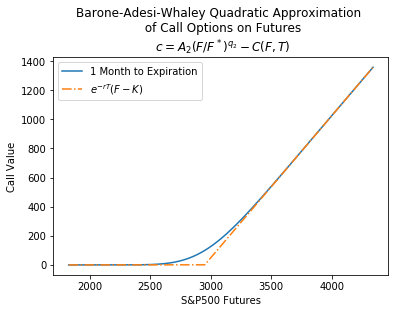

In [96]:
F
r=0.3
vol=0.3
deviat=1000
K=2950
Fstar=K*1.5
T=1/12
Mdivh=2*r/(vol**2*(1-np.exp(-r*T)))
q2= 0.5*(1+np.sqrt(1+4*Mdivh))
#myNormCDF3=np.array([myNormCDF(c) for a in d1])
#myNormCDF2=np.array([myNormCDF(b) for b in d2])

while(deviat>10**(-10)):
    d1 = (np.log(Fstar/K)+ (vol**2/2)*T)/(vol*np.sqrt(T))
    #print("d1",d1)
    g=Barone_Adesi_Whaley_BlackCall(K,Fstar,T,vol,r)+(Fstar/q2)*(1-np.exp(-r*T)*myNormCDF(d1))-Fstar+K
    #print("K,Fstar,T,vol,r",K,Fstar,T,vol,r)
    #print("g",g)
    gprime = -1+(np.exp(-r*T)*myNormCDF(d1))*(1-1/q2)+(1/q2)*(1-(np.exp(-r*T)*myNormPDF(d1))/(vol*np.sqrt(T)))
    #print("gprime",gprime)
    deviat=g/gprime
    #print("deviat",deviat)
    Fstar=Fstar-deviat
    #print("Fstar",Fstar)
    deviat=np.abs(deviat)
    #print("deviat",deviat)
    #print("-----------------------\n\n\n")

#print(1, 'Critical Futures Price = %6.2f \n', Fstar)
Fmin=1824.5; Fmax=4342.75; Fstep=0.1
FstarIndex=int(round((Fstar-Fmin)/Fstep));
F=np.arange(Fmin,Fmax,Fstep);
cEuropean=BlackCall(K,F,T,vol,r);
pEuropean = BlackPut(K,F,T,vol,r);
#Vectorize Code and avoid for-if loop to speed up code
CAmerican=np.zeros(len(F));

#C(F,T) = Quadrature Approx for F < Fstar
A2=np.zeros(len(F))
A2[0:FstarIndex-1]=(Fstar/q2)*(1-np.exp(-r*T)*myNormCDF(d1))
CAmerican[0:FstarIndex-1]=cEuropean[0:FstarIndex-1]+A2[0:FstarIndex-1]*(F[0:FstarIndex-1]/Fstar)**q2;

##C(F,T) = F-K for F >= Fstar
CAmerican[FstarIndex:]=F[FstarIndex:]-K;
FK=np.maximum(0,F-K);
FKemrt=np.exp(-r*T)*FK;
FstarK=Fstar-K;

CAmerican[22820]=(CAmerican[22819]+CAmerican[22821])/2

#plt.plot(F,CAmerican,label="American Call")
plt.plot(F,cEuropean,label="1 Month to Expiration")
#plt.plot(F,FK,'--',label='$F-K$')
plt.plot(F,FKemrt,'-.',label="$e^{-rT}(F-K)$")
plt.legend()
plt.title('Barone-Adesi-Whaley Quadratic Approximation \n of Call Options on Futures\n $c = A_2(F/F^*)^{q_2} - C(F,T)$')
plt.xlabel('S&P500 Futures'); plt.ylabel('Call Value')
#plt.plot(Fstar,FstarK)
#plt.legend(["CAmerican","cEuropean","FK","FKemrt","FstarK"]);
plt.savefig("Call33.jpg",bbox_inches='tight')
plt.show()

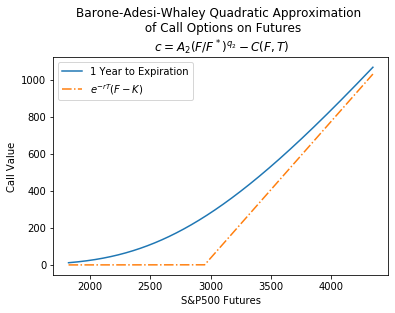

In [97]:
F
r=0.3
vol=0.3
deviat=1000
K=2950
Fstar=K*1.5
T=1
Mdivh=2*r/(vol**2*(1-np.exp(-r*T)))
q2= 0.5*(1+np.sqrt(1+4*Mdivh))
#myNormCDF3=np.array([myNormCDF(c) for a in d1])
#myNormCDF2=np.array([myNormCDF(b) for b in d2])

while(deviat>10**(-10)):
    d1 = (np.log(Fstar/K)+ (vol**2/2)*T)/(vol*np.sqrt(T))
    #print("d1",d1)
    g=Barone_Adesi_Whaley_BlackCall(K,Fstar,T,vol,r)+(Fstar/q2)*(1-np.exp(-r*T)*myNormCDF(d1))-Fstar+K
    #print("K,Fstar,T,vol,r",K,Fstar,T,vol,r)
    #print("g",g)
    gprime = -1+(np.exp(-r*T)*myNormCDF(d1))*(1-1/q2)+(1/q2)*(1-(np.exp(-r*T)*myNormPDF(d1))/(vol*np.sqrt(T)))
    #print("gprime",gprime)
    deviat=g/gprime
    #print("deviat",deviat)
    Fstar=Fstar-deviat
    #print("Fstar",Fstar)
    deviat=np.abs(deviat)
    #print("deviat",deviat)
    #print("-----------------------\n\n\n")

#print(1, 'Critical Futures Price = %6.2f \n', Fstar)
Fmin=1824.5; Fmax=4342.75; Fstep=0.1
FstarIndex=int(round((Fstar-Fmin)/Fstep));
F=np.arange(Fmin,Fmax,Fstep);
cEuropean=BlackCall(K,F,T,vol,r);
#Vectorize Code and avoid for-if loop to speed up code
CAmerican=np.zeros(len(F));

#C(F,T) = Quadrature Approx for F < Fstar
A2=np.zeros(len(F))
A2[0:FstarIndex-1]=(Fstar/q2)*(1-np.exp(-r*T)*myNormCDF(d1))
CAmerican[0:FstarIndex-1]=cEuropean[0:FstarIndex-1]+A2[0:FstarIndex-1]*(F[0:FstarIndex-1]/Fstar)**q2;

##C(F,T) = F-K for F >= Fstar
CAmerican[FstarIndex:]=F[FstarIndex:]-K;
FK=np.maximum(0,F-K);
FKemrt=np.exp(-r*T)*FK;
FstarK=Fstar-K;

CAmerican[22820]=(CAmerican[22819]+CAmerican[22821])/2

#plt.plot(F,CAmerican,label="American Call")
plt.plot(F,cEuropean,label="1 Year to Expiration")
#plt.plot(F,FK,'--',label='$F-K$')
plt.plot(F,FKemrt,'-.',label="$e^{-rT}(F-K)$")
plt.legend()
plt.title('Barone-Adesi-Whaley Quadratic Approximation \n of Call Options on Futures\n $c = A_2(F/F^*)^{q_2} - C(F,T)$')
plt.xlabel('S&P500 Futures'); plt.ylabel('Call Value')
#plt.plot(Fstar,FstarK)
#plt.legend(["CAmerican","cEuropean","FK","FKemrt","FstarK"]);
plt.savefig("Call44.jpg",bbox_inches='tight')
plt.show()

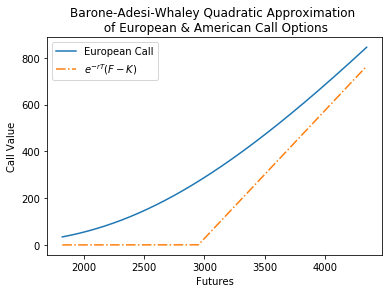

In [36]:
F
r=0.3
vol=0.3
deviat=1000
K=2950
Fstar=K*1.5
T=2
Mdivh=2*r/(vol**2*(1-np.exp(-r*T)))
q2= 0.5*(1+np.sqrt(1+4*Mdivh))
#myNormCDF3=np.array([myNormCDF(c) for a in d1])
#myNormCDF2=np.array([myNormCDF(b) for b in d2])

while(deviat>10**(-10)):
    d1 = (np.log(Fstar/K)+ (vol**2/2)*T)/(vol*np.sqrt(T))
    #print("d1",d1)
    g=Barone_Adesi_Whaley_BlackCall(K,Fstar,T,vol,r)+(Fstar/q2)*(1-np.exp(-r*T)*myNormCDF(d1))-Fstar+K
    #print("K,Fstar,T,vol,r",K,Fstar,T,vol,r)
    #print("g",g)
    gprime = -1+(np.exp(-r*T)*myNormCDF(d1))*(1-1/q2)+(1/q2)*(1-(np.exp(-r*T)*myNormPDF(d1))/(vol*np.sqrt(T)))
    #print("gprime",gprime)
    deviat=g/gprime
    #print("deviat",deviat)
    Fstar=Fstar-deviat
    #print("Fstar",Fstar)
    deviat=np.abs(deviat)
    #print("deviat",deviat)
    #print("-----------------------\n\n\n")

#print(1, 'Critical Futures Price = %6.2f \n', Fstar)
Fmin=1824.5; Fmax=4342.75; Fstep=0.1
FstarIndex=int(round((Fstar-Fmin)/Fstep));
F=np.arange(Fmin,Fmax,Fstep);
cEuropean=BlackCall(K,F,T,vol,r);
#Vectorize Code and avoid for-if loop to speed up code
CAmerican=np.zeros(len(F));

#C(F,T) = Quadrature Approx for F < Fstar
A2=np.zeros(len(F))
A2[0:FstarIndex-1]=(Fstar/q2)*(1-np.exp(-r*T)*myNormCDF(d1))
CAmerican[0:FstarIndex-1]=cEuropean[0:FstarIndex-1]+A2[0:FstarIndex-1]*(F[0:FstarIndex-1]/Fstar)**q2;

##C(F,T) = F-K for F >= Fstar
CAmerican[FstarIndex:]=F[FstarIndex:]-K;
FK=np.maximum(0,F-K);
FKemrt=np.exp(-r*T)*FK;
FstarK=Fstar-K;

CAmerican[22820]=(CAmerican[22819]+CAmerican[22821])/2

#plt.plot(F,CAmerican,label="American Call")
plt.plot(F,cEuropean,label="European Call")
#plt.plot(F,FK,'--',label='$F-K$')
plt.plot(F,FKemrt,'-.',label="$e^{-rT}(F-K)$")
plt.legend()
plt.title('Barone-Adesi-Whaley Quadratic Approximation \n of European & American Call Options')
plt.xlabel('Futures'); plt.ylabel('Call Value')
#plt.plot(Fstar,FstarK)
#plt.legend(["CAmerican","cEuropean","FK","FKemrt","FstarK"]);
plt.show()

### Pricing Call Options using Barone-Adesi-Whaley Approximation

In [37]:
def Barone_Adesi_Whaley_BlackCall(K,F,T,vol,r):
    d2 = d1-vol*np.sqrt(T)
    return np.exp(-r*T)*(F*myNormCDF(d1)-K*myNormCDF(d2))

In [38]:
Mdivh=2*r/(vol**2*(1-np.exp(-r*T)))
A2=(Fstar/q2)*(1-np.exp(-r*T)*myNormCDF(d1))
q2= 0.5*(1+np.sqrt(1+4*Mdivh))

In [39]:
C = Barone_Adesi_Whaley_BlackCall(4275,4475.50,1/12,0.1650,0.22)
F =4439.75;
K =4275
c = C + A2*(F/Fstar)**q2 
c


819.044456304938

In [40]:
C = Barone_Adesi_Whaley_BlackCall(2950,4439.75,3,1.3,1.6)
C

28.522849958691918

### BAW Call Option Values

In [41]:
cEuropean

array([ 34.23093319,  34.24074016,  34.25054899, ..., 845.06650533,
       845.11421821, 845.16193172])

In [42]:
min(cEuropean),max(cEuropean)

(34.230933189770695, 845.1619317191654)

### Pricing Put Options using Barone-Adesi-Whaley Approximation

In [43]:
def Barone_Adesi_Whaley_BlackPut(K,F,T,vol,r):
    d2 = -d1-vol*np.sqrt(T)
    return np.exp(-r*T)*(K*myNormCDF(-d2)-F*myNormCDF(-d1))

In [44]:
P = Barone_Adesi_Whaley_BlackPut(2950,4439.75,3,1.3,1.6)
P

19.231590638027377

In [45]:
p = P + A2*(F/Fstar)**q2 
p

623.3776057398076

### BAW Put Option Values

In [46]:
pEuropean

array([1.16125343e-04, 1.16520422e-04, 1.16916776e-04, ...,
       6.37140524e+03, 6.37220607e+03, 6.37300695e+03])

In [47]:
min(pEuropean)

0.00011612534290520082

In [48]:
#list(pEuropean)

## Black's Root Mean Squared Error (Call Options)

$$RMSE = \sqrt{\frac{1}{N}\sum(C_{Actual} - C_{Model})}$$

In [49]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
#Arrays of Actual and Predicted Call Options
Actual = np.array([221.42,223.12,252.09,263.75,293.65])
Model = np.array([215.158,256.06,240.521,290.761,237.786])
#Calculate RMSE
Result = sqrt(mean_squared_error(Actual,Model))
# Print the result
print("Black's RMSE = ", Result)

Black's RMSE =  31.96397541608365


## Black's Root Mean Squared Error (Put Options)

$$RMSE = \sqrt{\frac{1}{N}\sum(P_{Actual} - P_{Model})}$$

In [50]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
#Arrays of Actual and Predicted Put Options
Actual = np.array([4.30,4.80,5.60,5.40,4.90])
Model = np.array([0.4218,0.7271,2.3545,1.1571,0.8340])
#Calculate RMSE
Result = sqrt(mean_squared_error(Actual,Model))
# Print the result
print("Black's RMSE = ", Result)

Black's RMSE =  3.916548896924434


## Barone-Adesi-Whaley Root Mean Squared Error (Call Options)

$$RMSE = \sqrt{\frac{1}{N}\sum(C_{Actual} - C_{Model})}$$

In [51]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
#Arrays of Actual and Predicted Call Options
Actual = np.array([221.42,223.12,252.09,263.75,293.65])
Model = np.array([214.892,227.314,197.473,201.054,177.293])
#Calculate RMSE
Result = sqrt(mean_squared_error(Actual, Model))
# Print the result
print("BA-W RMSE = ", Result)

BA-W RMSE =  64.05148081660563


## Barone-Adesi-Whaley Root Mean Squared Error (Put Options)

$$RMSE = \sqrt{\frac{1}{N}\sum(P_{Actual} - P_{Model})}$$

In [52]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
#Arrays of Actual and Predicted Put Options
Actual = np.array([4.30,4.80,5.60,5.40,4.90])
Model = np.array([0.2116,0.4073,0.9867,0.7230,0.4996])
#Calculate RMSE
Result = sqrt(mean_squared_error(Actual,Model))
# Print the result
print("BA-W RMSE = ", Result)

BA-W RMSE =  4.439171406918188
